<a href="https://colab.research.google.com/github/pranav168/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [600]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [601]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
!pip install colorama
from colorama import Fore
import warnings
warnings.filterwarnings("ignore")

In [602]:
df=pd.read_csv('/content/drive/MyDrive/Copy of Hotel Bookings.csv')

In [603]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [604]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [605]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [606]:
df.describe()       

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [607]:
column_list=['country','hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
        'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date']
count_dataset=pd.DataFrame()
distinct_features=[]                                                                                          #Empty list to know the number of distict features,sum of all these values, and sum of values top 10 comprises
for i in column_list:                                                                                               
  count_dataset[i]= pd.Series(df[i].value_counts().sort_values(ascending=False).head(10).index)      
  count_dataset[f'{i}_count']=pd.Series(df[i].value_counts().sort_values(ascending=False).head(10).values).astype('int')   
  distinct_features.append((len(df[i].value_counts().index),df[i].value_counts().sum(),df[i].value_counts().sort_values(ascending=False).head(10).sum())) 
final_tally=list(zip(count_list,distinct_features))                                                           #Zipping with column_list
count_dataset   
col_ref={}  
for i in column_list:
  if i in ['children','country','agent','company']:                                                           #colur red shows the features having some Nan
    col_ref[i]='background-color: red'  
  else:
    col_ref[i]='background-color: blue'                                                                       #colur blue shows the features 
  temp=f'{i}_count'
  col_ref[temp]='background-color: green'                                                                     #colur blue shows the count
def Nan_as_black(val):
  if str(val)=='nan':
    color = 'black'
    return 'color: %s' % color
count_dataset=count_dataset.style.apply(lambda x: pd.DataFrame(col_ref, index=count_dataset.index, columns=count_dataset.columns).fillna(''), axis=None).highlight_null('black').applymap(Nan_as_black)
count_dataset

,country,country_count,hotel,hotel_count,is_canceled,is_canceled_count,lead_time,lead_time_count,arrival_date_year,arrival_date_year_count,arrival_date_month,arrival_date_month_count,arrival_date_week_number,arrival_date_week_number_count,arrival_date_day_of_month,arrival_date_day_of_month_count,stays_in_weekend_nights,stays_in_weekend_nights_count,stays_in_week_nights,stays_in_week_nights_count,adults,adults_count,children,children_count,babies,babies_count,meal,meal_count,market_segment,market_segment_count,distribution_channel,distribution_channel_count,is_repeated_guest,is_repeated_guest_count,previous_cancellations,previous_cancellations_count,previous_bookings_not_canceled,previous_bookings_not_canceled_count,reserved_room_type,reserved_room_type_count,assigned_room_type,assigned_room_type_count,booking_changes,booking_changes_count,deposit_type,deposit_type_count,agent,agent_count,company,company_count,days_in_waiting_list,days_in_waiting_list_count,customer_type,customer_type_count,adr,adr_count,required_car_parking_spaces,required_car_parking_spaces_count,total_of_special_requests,total_of_special_requests_count,reservation_status,reservation_status_count,reservation_status_date,reservation_status_date_count
0,PRT,48590,City Hotel,79330.000000,0.000000,75166.000000,0,6345,2016.000000,56707.000000,August,13877,33,3580,17,4406,0,51998,2,33684,2,89680,0.000000,110796.000000,0.000000,118473.000000,BB,92310.000000,Online TA,56477.000000,TA/TO,97870.000000,0.000000,115580.000000,0,112906,0,115770,A,85994,A,74053,0,101314,No Deposit,104641.000000,9.000000,31961,40.000000,927,0,115692,Transient,89613.000000,62.000000,3754,0.000000,111974.000000,0.000000,70318.000000,Check-Out,75166.000000,2015-10-21,1461
1,GBR,12129,Resort Hotel,40060.000000,1.000000,44224.000000,1,3460,2017.000000,40687.000000,July,12661,30,3087,5,4317,2,33308,1,30310,1,23027,1.000000,4861.000000,1.000000,900.000000,HB,14463.000000,Offline TA/TO,24219.000000,Direct,14645.000000,1.000000,3810.000000,1,6051,1,1542,D,19201,D,25322,1,12701,Non Refund,14587.000000,240.000000,13922,223.000000,784,39,227,Transient-Party,25124.000000,75.000000,2715,1.000000,7383.000000,1.000000,33226.000000,Canceled,43017.000000,2015-07-06,805
2,FRA,10415,nan,nan,nan,nan,2,2069,2015.000000,21996.000000,May,11791,32,3045,15,4196,1,30626,3,22258,3,6202,2.000000,3652.000000,2.000000,15.000000,SC,10650.000000,Groups,19811.000000,Corporate,6677.000000,nan,nan,2,116,2,580,E,6535,E,7806,2,3805,Refundable,162.000000,1.000000,7191,67.000000,267,58,164,Contract,4076.000000,90.000000,2473,2.000000,28.000000,2.000000,12969.000000,No-Show,1207.000000,2016-11-25,790
3,ESP,8568,nan,nan,nan,nan,3,1816,nan,nan,October,11160,34,3040,25,4160,4,1855,5,11077,0,403,3.000000,76.000000,9.000000,1.000000,Undefined,1169.000000,Direct,12606.000000,GDS,193.000000,nan,nan,3,65,3,333,F,2897,F,3751,3,927,nan,nan,14.000000,3640,45.000000,250,44,141,Group,577.000000,65.000000,2418,3.000000,3.000000,3.000000,2497.000000,nan,nan,2015-01-01,763
4,DEU,7287,nan,nan,nan,nan,4,1715,nan,nan,April,11089,18,2926,26,4147,3,1259,4,9563,4,62,10.000000,1.000000,10.000000,1.000000,FB,798.000000,Corporate,5295.000000,Undefined,5.000000,nan,nan,24,48,4,229,G,2094,G,2553,4,376,nan,nan,7.000000,3539,153.000000,215,31,127,nan,nan,0.000000,1959,8.000000,2.000000,4.000000,340.000000,nan,nan,2016-01-18,625
5,ITA,3766,nan,nan,nan,nan,5,1565,nan,nan,June,10939,21,2854,9,4096,6,153,0,7645,26,5,nan,nan,nan,nan,nan,nan,Complementary,743.000000,nan,nan,nan,nan,11,35,5,181,B,1118,C,2375,5,118,nan,nan,6.000000,3290,174.000000,149,35,96,nan,nan,80.000000,1889,nan,nan,5.000000,40.000000,nan,nan,2015-07-02,469
6,IRL,3375,nan,nan,nan,nan,6,1445,nan,nan,September,10508,28,2853,12,4087,5,79,6,1499,5,2,nan,nan,nan,nan,nan,nan,Aviation,237.000000,nan,nan,nan,nan,4,31,6,115,C,932,B,2163,6,63,nan,nan,250.000000,2870,219.000000,141,46,94,nan,nan,95.000000,1661,nan,nan,nan,nan,nan,nan,2016-12-07,450
7,BEL,2342,nan,nan,nan,nan,7,1331,nan,nan,March,9794,17,28

In [608]:
final_tally

[('country', (177, 118902, 100800)),
 ('hotel', (2, 119390, 119390)),
 ('is_canceled', (2, 119390, 119390)),
 ('lead_time', (479, 119390, 21963)),
 ('arrival_date_year', (3, 119390, 119390)),
 ('arrival_date_month', (12, 119390, 106681)),
 ('arrival_date_week_number', (53, 119390, 29738)),
 ('arrival_date_day_of_month', (31, 119390, 41594)),
 ('stays_in_weekend_nights', (17, 119390, 119368)),
 ('stays_in_week_nights', (35, 119390, 118757)),
 ('adults', (14, 119390, 119386)),
 ('children', (5, 119386, 119386)),
 ('babies', (5, 119390, 119390)),
 ('meal', (5, 119390, 119390)),
 ('market_segment', (8, 119390, 119390)),
 ('distribution_channel', (5, 119390, 119390)),
 ('is_repeated_guest', (2, 119390, 119390)),
 ('previous_cancellations', (15, 119390, 119325)),
 ('previous_bookings_not_canceled', (73, 119390, 118968)),
 ('reserved_room_type', (10, 119390, 119390)),
 ('assigned_room_type', (12, 119390, 119377)),
 ('booking_changes', (21, 119390, 119360)),
 ('deposit_type', (3, 119390, 11939

In [609]:
df.children[df['children'].isna()]=0# will replace 4 Nan values for children by 0 as it wont affect our data in any way    
try:
  df.drop('company',axis=1,inplace=True)  # company data is so less that it is almost non reproducible, if reproduced could lead to wrong interpretations,and their are no basis on which clusters could be formed thus i will drop the entire columns
except:
  pass
top5_country=df['country'].value_counts().sort_values(ascending=False).head(5)         # for countries i will distribute the values  between top 5 as they hold exclusive dominance usnig random forest
top30_agents=df['agent'].value_counts().sort_values(ascending=False).head(5)           # for agents i will distribute the values between top 5 as they hold exclusive dominance usnig random forest
print(top5_country.sum())
print(top30_agents.sum())

86989
60253


In [610]:
df_top5_country=df[(df['country']=='GBR') | (df['country']=='PRT')| (df['country']=='FRA')| (df['country']=='ESP')| (df['country']=='DEU')] 
nan_country=df[df['country'].isna()]
'''-------------------------------------------------------------------------------------------------------------------------predicting countries----------------------------'''
def country2int(x):
  country_list=['PRT','GBR','FRA','ESP','DEU']
  count=0
  for i in country_list:
    count+=1
    if x==i:
      return count
    
df_top5_country['country']=df_top5_country['country'].apply(lambda x :country2int(x))
X_train=df_top5_country[df_top5_country.describe().columns].drop(['country','agent'],axis=1)
y_train=df_top5_country['country']
X_test= nan_country[nan_country.describe().columns].drop(['agent'],axis=1)
def RandomForest_model(X_train,y_train,X_test):
  model=RandomForestClassifier(n_estimators=100,max_depth=20,random_state=0)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  return y_pred
y_pred=RandomForest_model(X_train,y_train,X_test)
nan_country['country']=y_pred
def int2country(x):
  country_list=['PRT','GBR','FRA','ESP','DEU']
  for i in range(1,6):
    if str(x)==str(i):
      return country_list[i-1]
nan_country['country']=nan_country['country'].apply(lambda x : int2country(x))
nan_country.country.value_counts()
for i in nan_country.index:
    df.loc[i]=nan_country.loc[i] 


In [611]:
df_top5_agent=df[(df['agent']==9) | (df['agent']==240)| (df['agent']==1)| (df['agent']==14)| (df['agent']==7)] 
nan_agent=df[df['agent'].isna()]
'''-------------------------------------------------------------------------------------------------------------------------predicting agents----------------------------'''
X_train=df_top5_agent[df_top5_agent.describe().columns].drop(['agent'],axis=1)
y_train=df_top5_agent['agent']
X_test= nan_agent[nan_agent.describe().columns].drop(['agent'],axis=1)
y_pred=RandomForest_model(X_train,y_train,X_test)
nan_agent['agent']=y_pred
print(nan_agent.agent.value_counts())
index_list=[]
for i in nan_agent.index:
  index_list.append(i)
df.loc[index_list]=nan_agent.loc[index_list] 


240.0    7883
9.0      6912
1.0       620
14.0      463
7.0       462
Name: agent, dtype: int64


In [612]:
df.isna().sum() #no null values are their

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

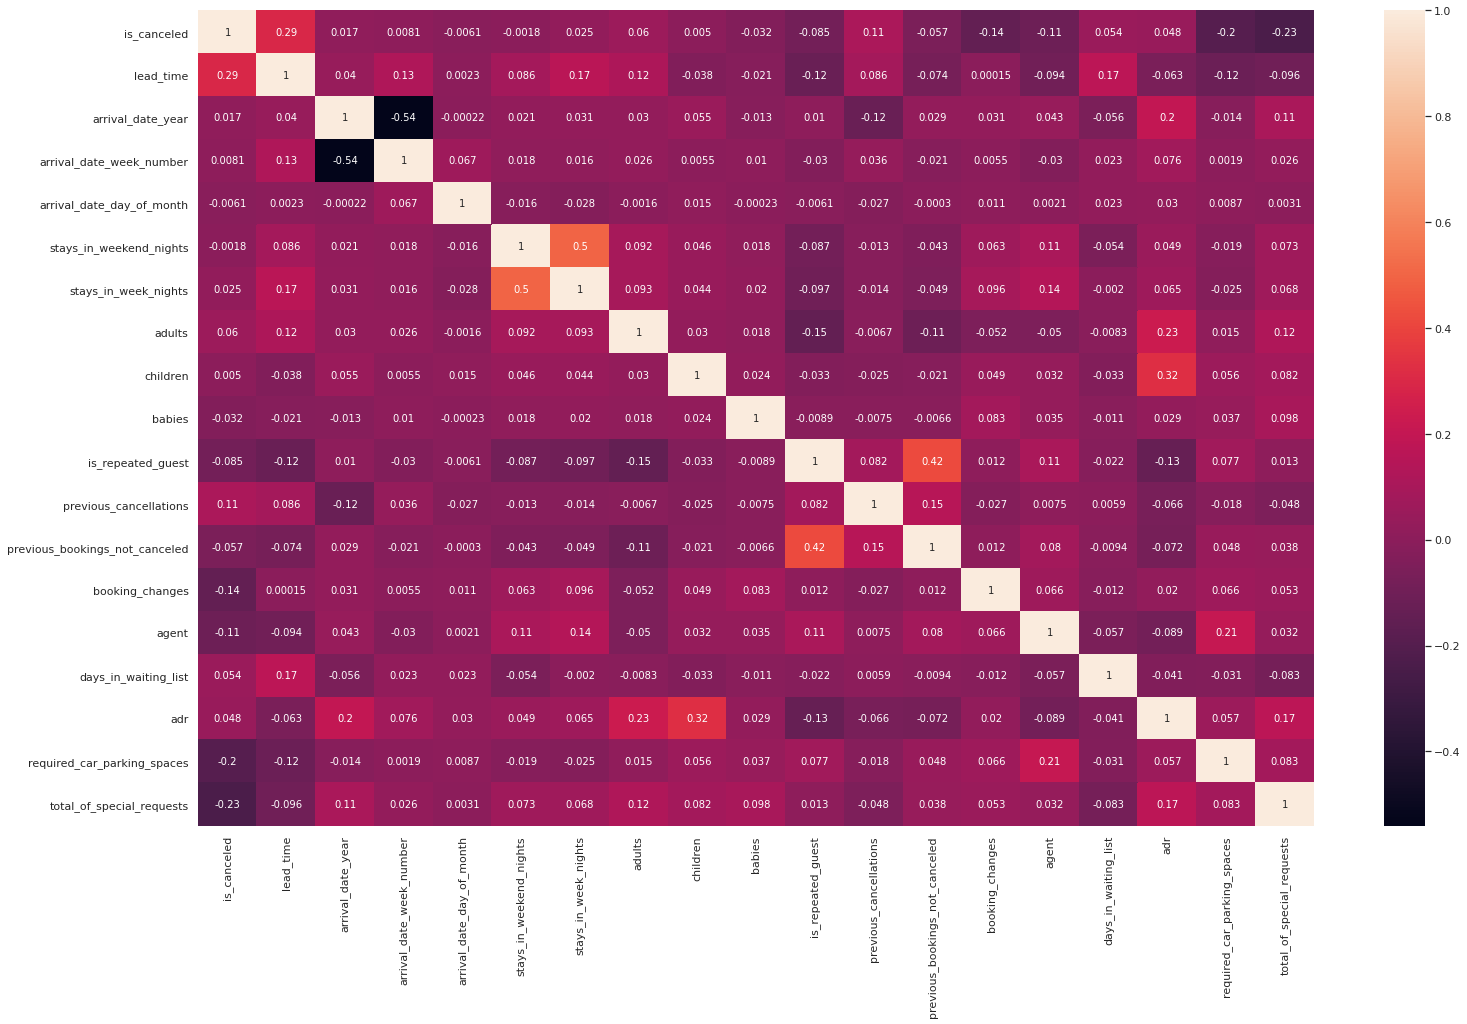

In [674]:
corr = df.corr()                                                                #plotting co-relation chart
plt.figure(figsize=(25,15))
sns.heatmap(corr, annot=True)
plt.show()                                                                      #there is not much co-relation between any of the feature

#Comparision between city and resort hotel

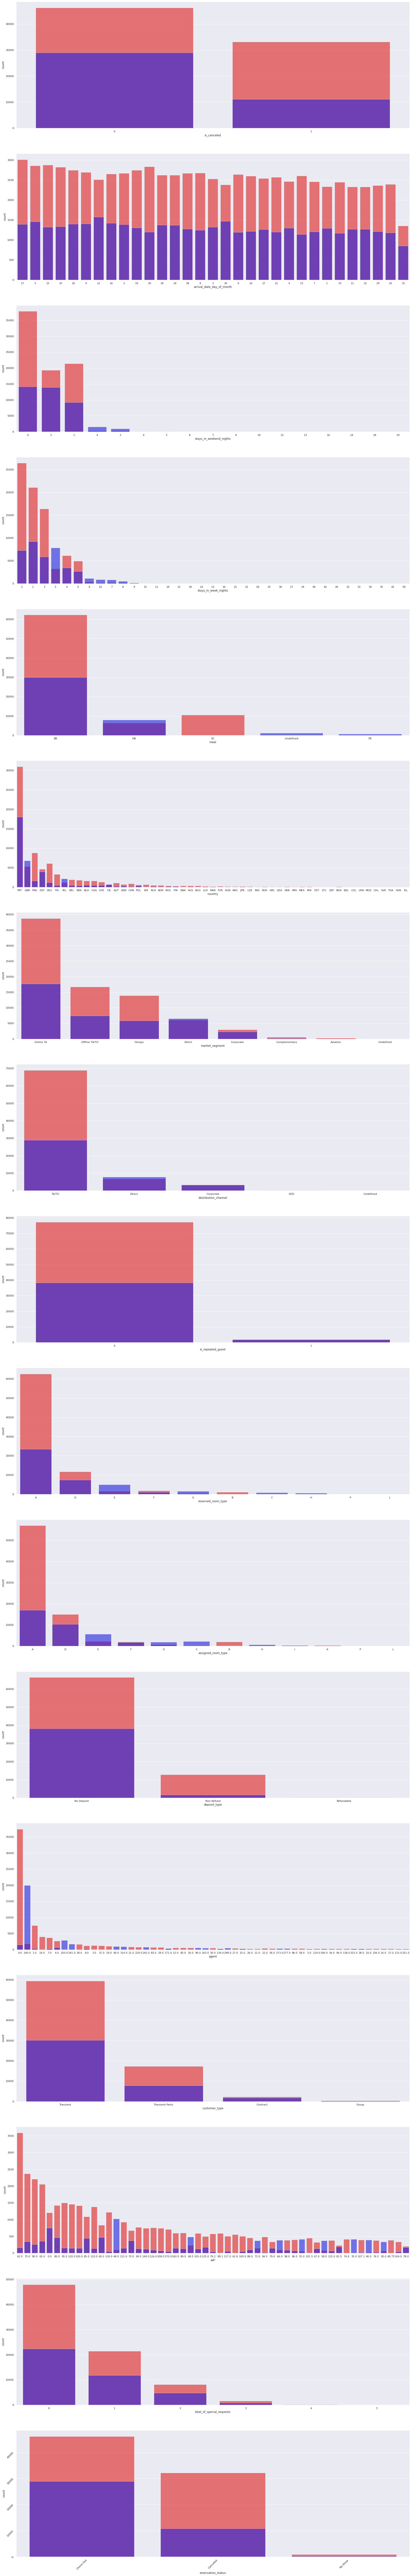

In [617]:
columns = ['is_canceled',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights','meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 
       'reserved_room_type',
       'assigned_room_type', 'deposit_type', 'agent',
       'customer_type', 'adr',
       'total_of_special_requests',
       'reservation_status', ]     
df_city_hotel=df[df.hotel=='City Hotel']                                        # head on comparision between city and resort hotel
df_Resort_hotel= df[df.hotel=='Resort Hotel']
fig, axs = plt.subplots(len(columns),figsize=(30,200))
count=0
for i in columns:
    sns.countplot(df_city_hotel[i],ax=axs[count],order=df[i].value_counts().iloc[:53].index, color='red',alpha=0.6)
    sns.countplot(df_Resort_hotel[i],ax=axs[count],order=df[i].value_counts().iloc[:53].index, color='blue',alpha=0.6)
    plt.tick_params(labelrotation=45)
    count+=1
       

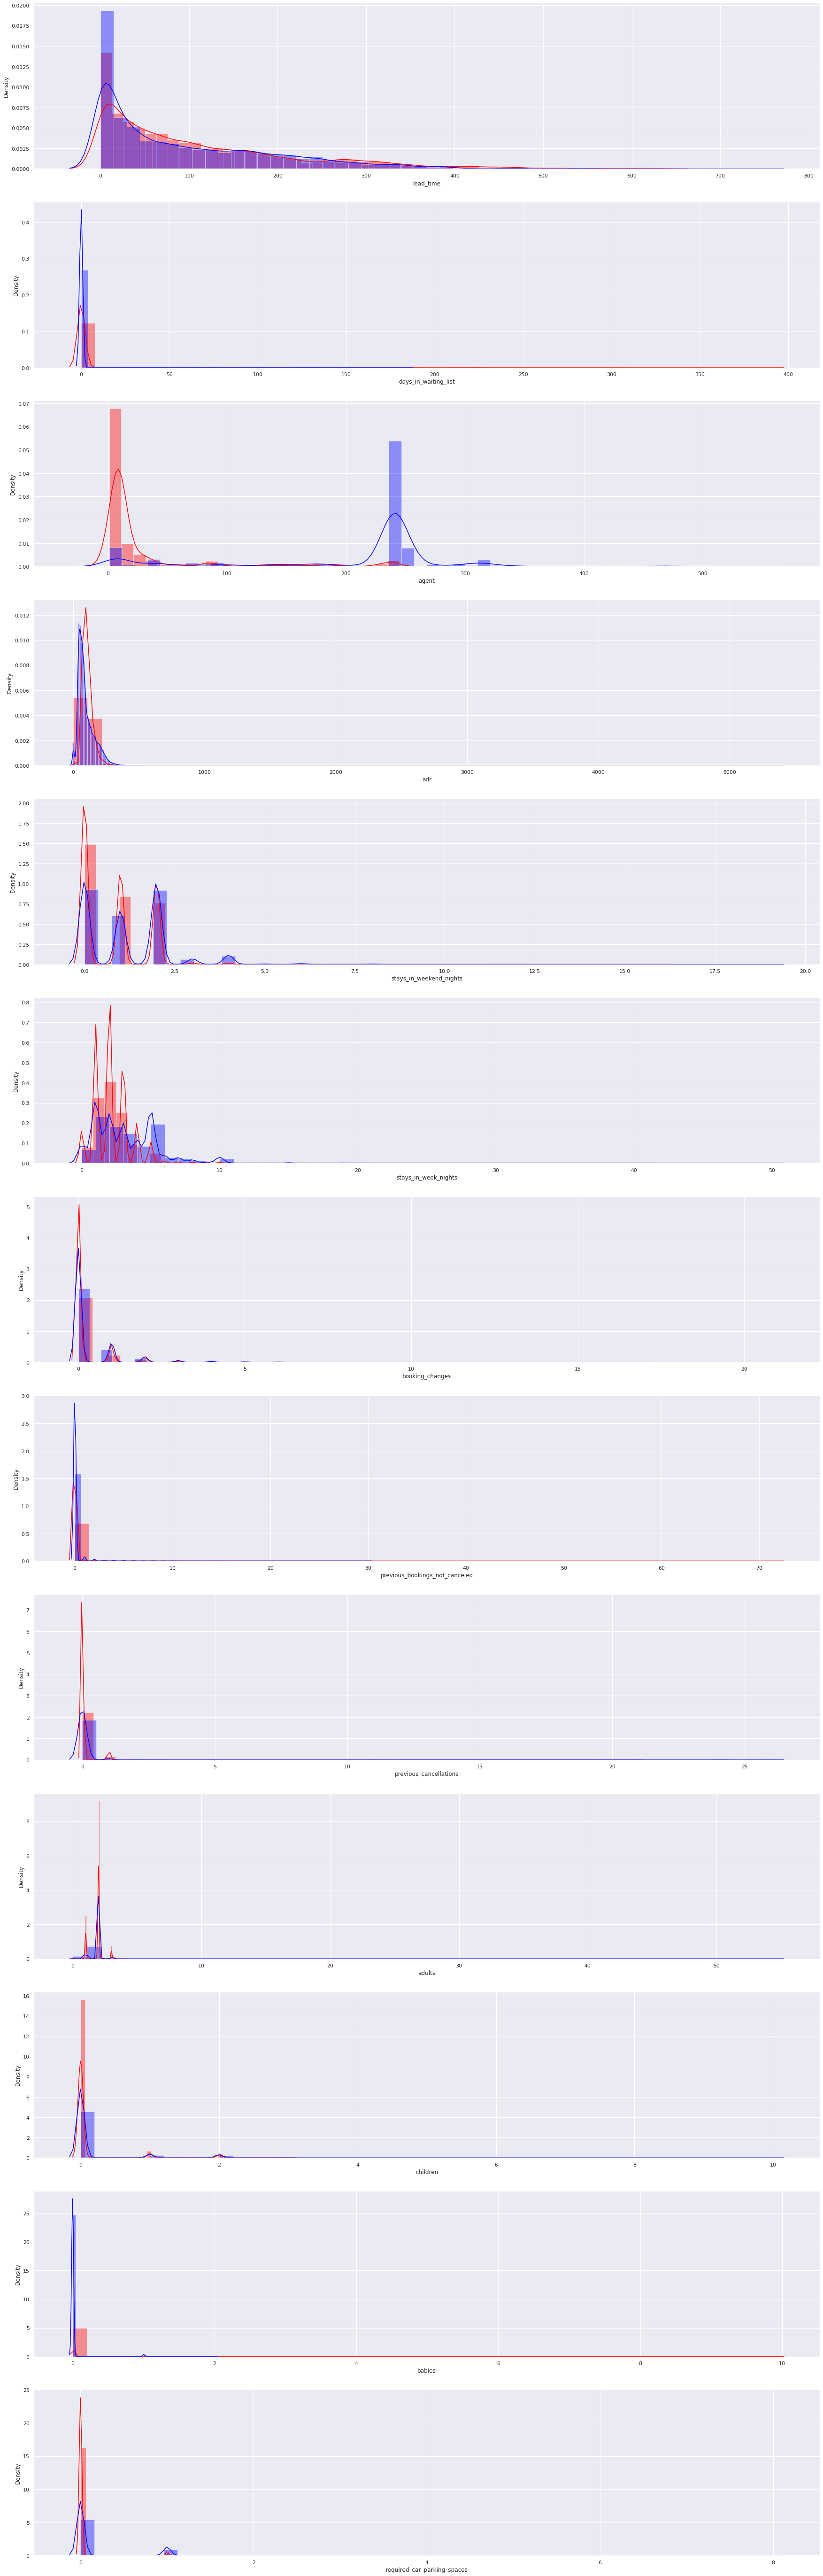

In [614]:
dist=['lead_time','days_in_waiting_list','agent','adr','stays_in_weekend_nights','stays_in_week_nights','booking_changes','previous_bookings_not_canceled','previous_cancellations','adults','children','babies','required_car_parking_spaces']
fig, axs = plt.subplots(len(dist),1,figsize=(30,100))
count=0
for i in dist:
    sns.distplot(df_city_hotel[i],ax=axs[count],color='red')
    sns.distplot(df_Resort_hotel[i],ax=axs[count],color='blue')
    count+=1

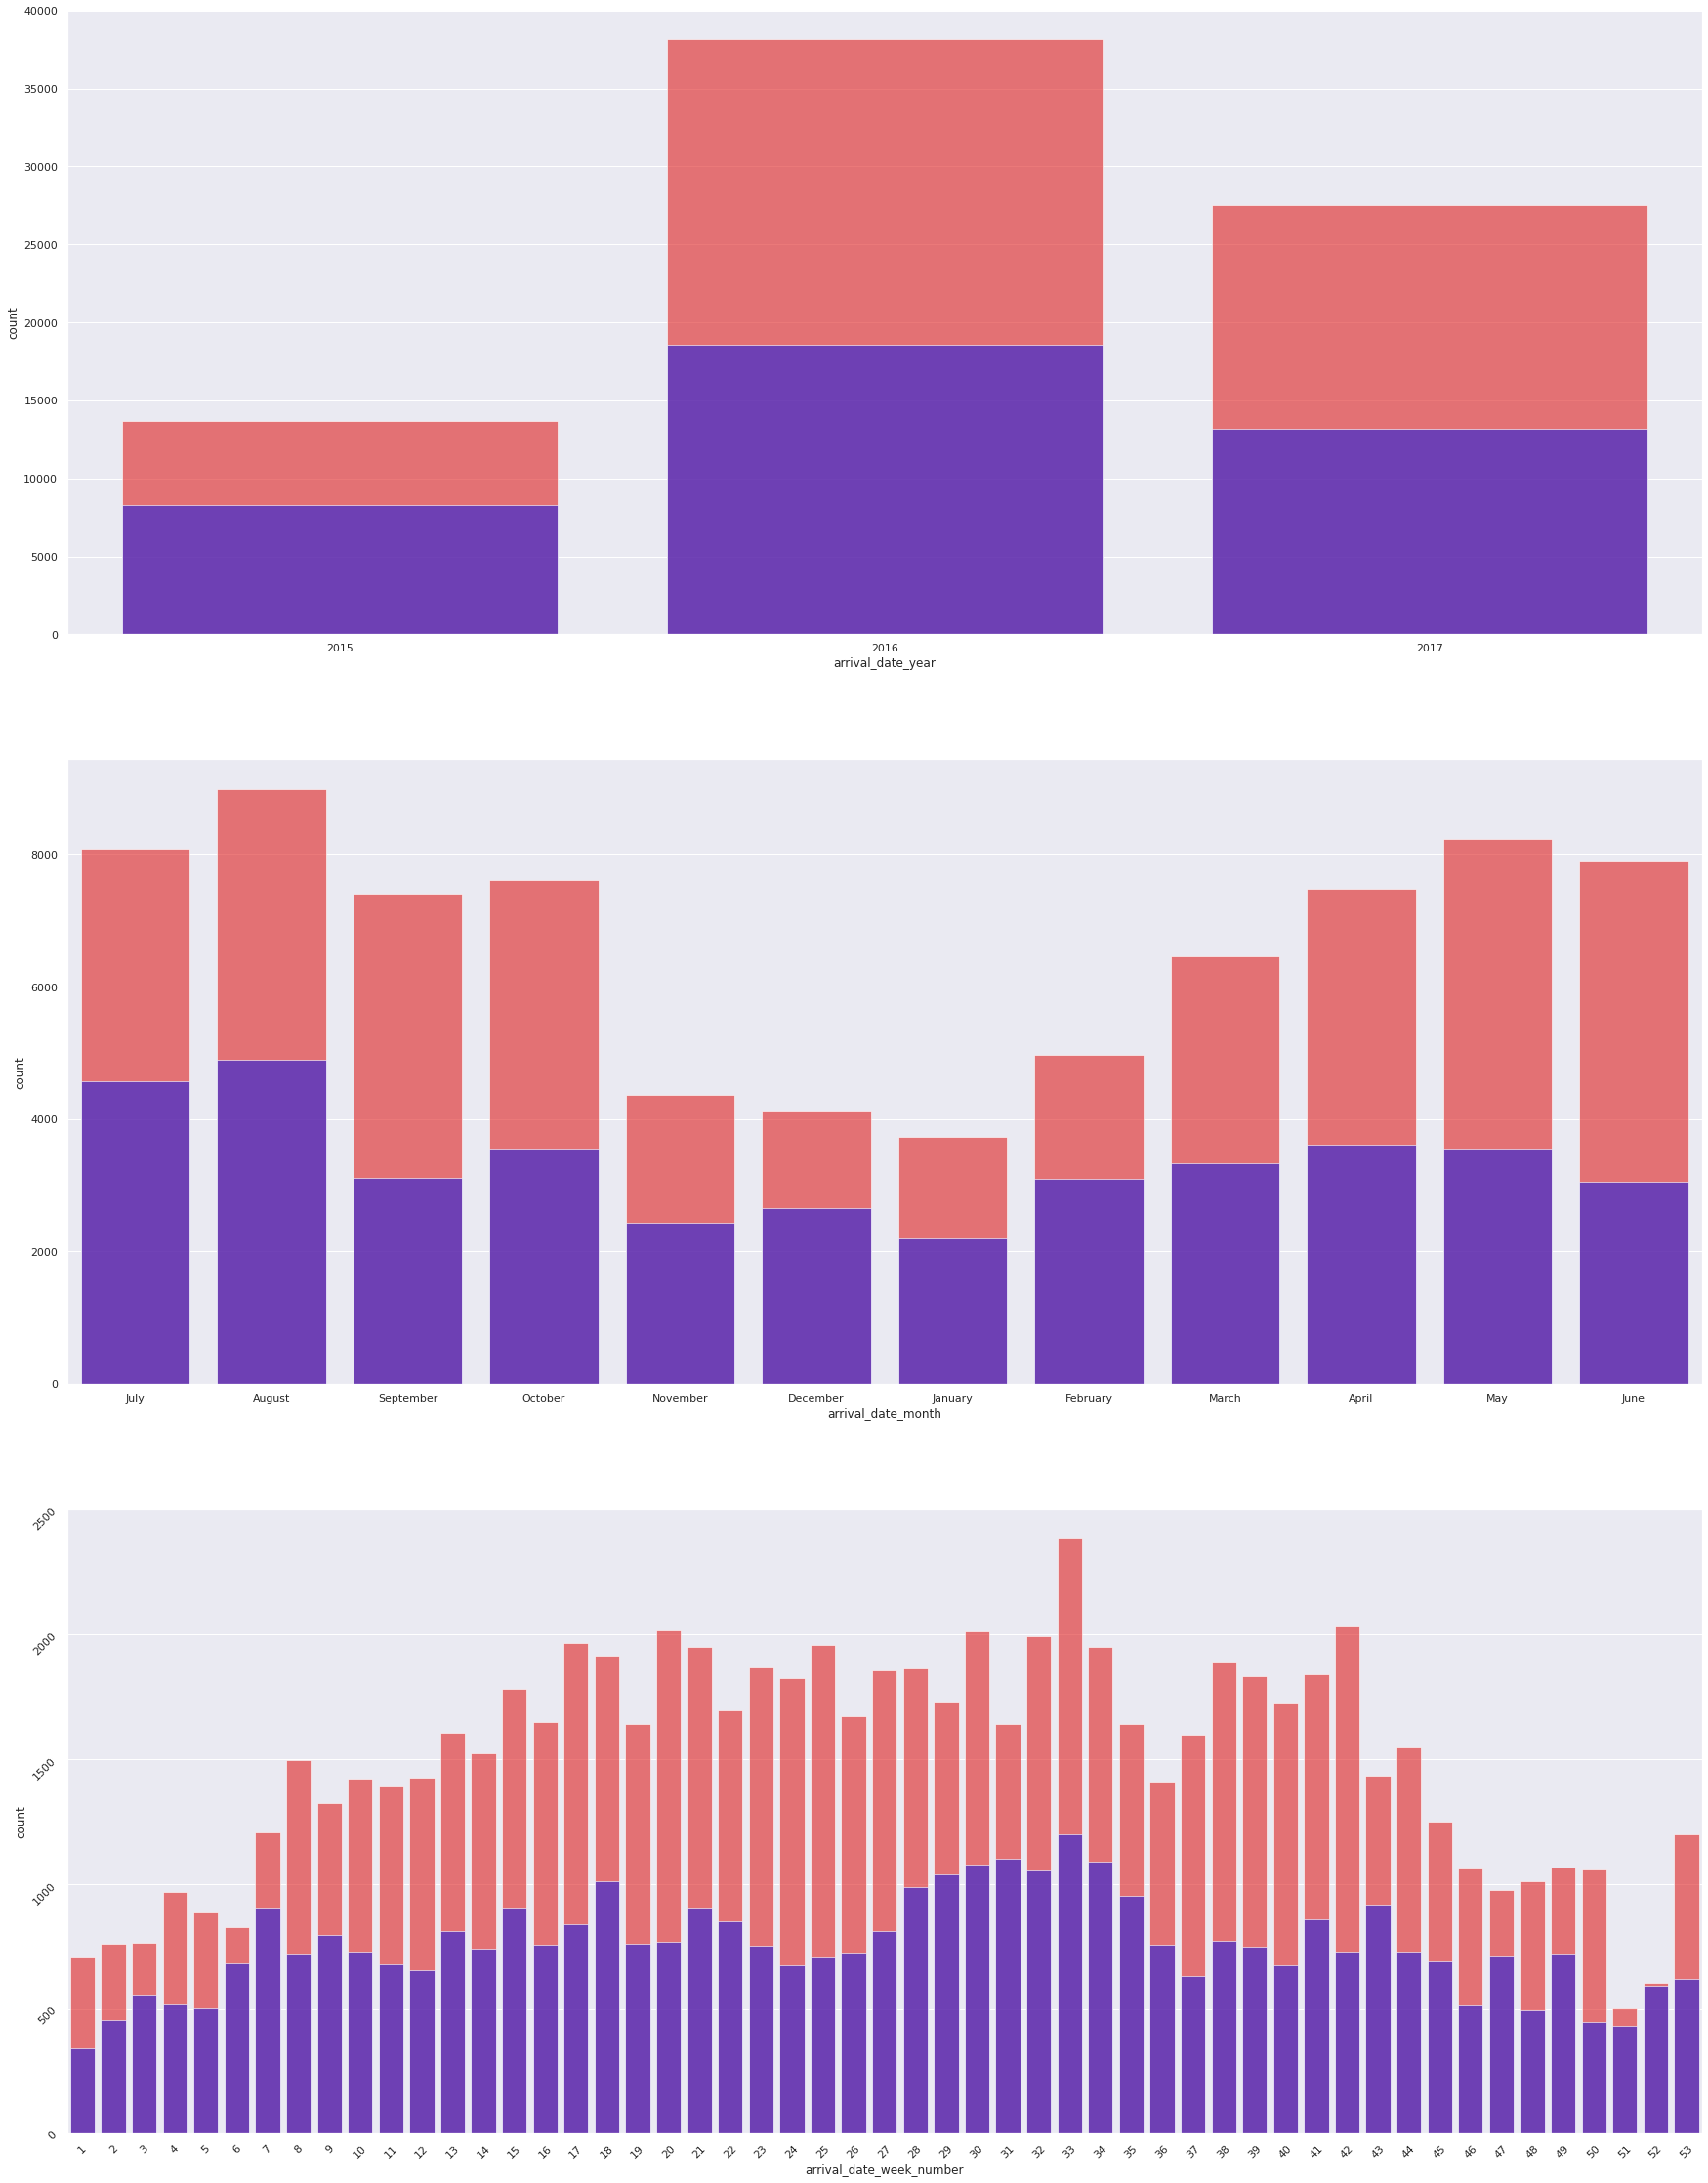

In [619]:
columns2=['arrival_date_year','arrival_date_month', 'arrival_date_week_number']
fig, axs = plt.subplots(len(columns2),figsize=(30,40))
count=0
for i in columns2:
    sns.countplot(df_city_hotel[i],ax=axs[count], color='red',alpha=0.6)
    sns.countplot(df_Resort_hotel[i],ax=axs[count], color='blue',alpha=0.6)
    plt.tick_params(labelrotation=45)
    count+=1


#Timing Analysis

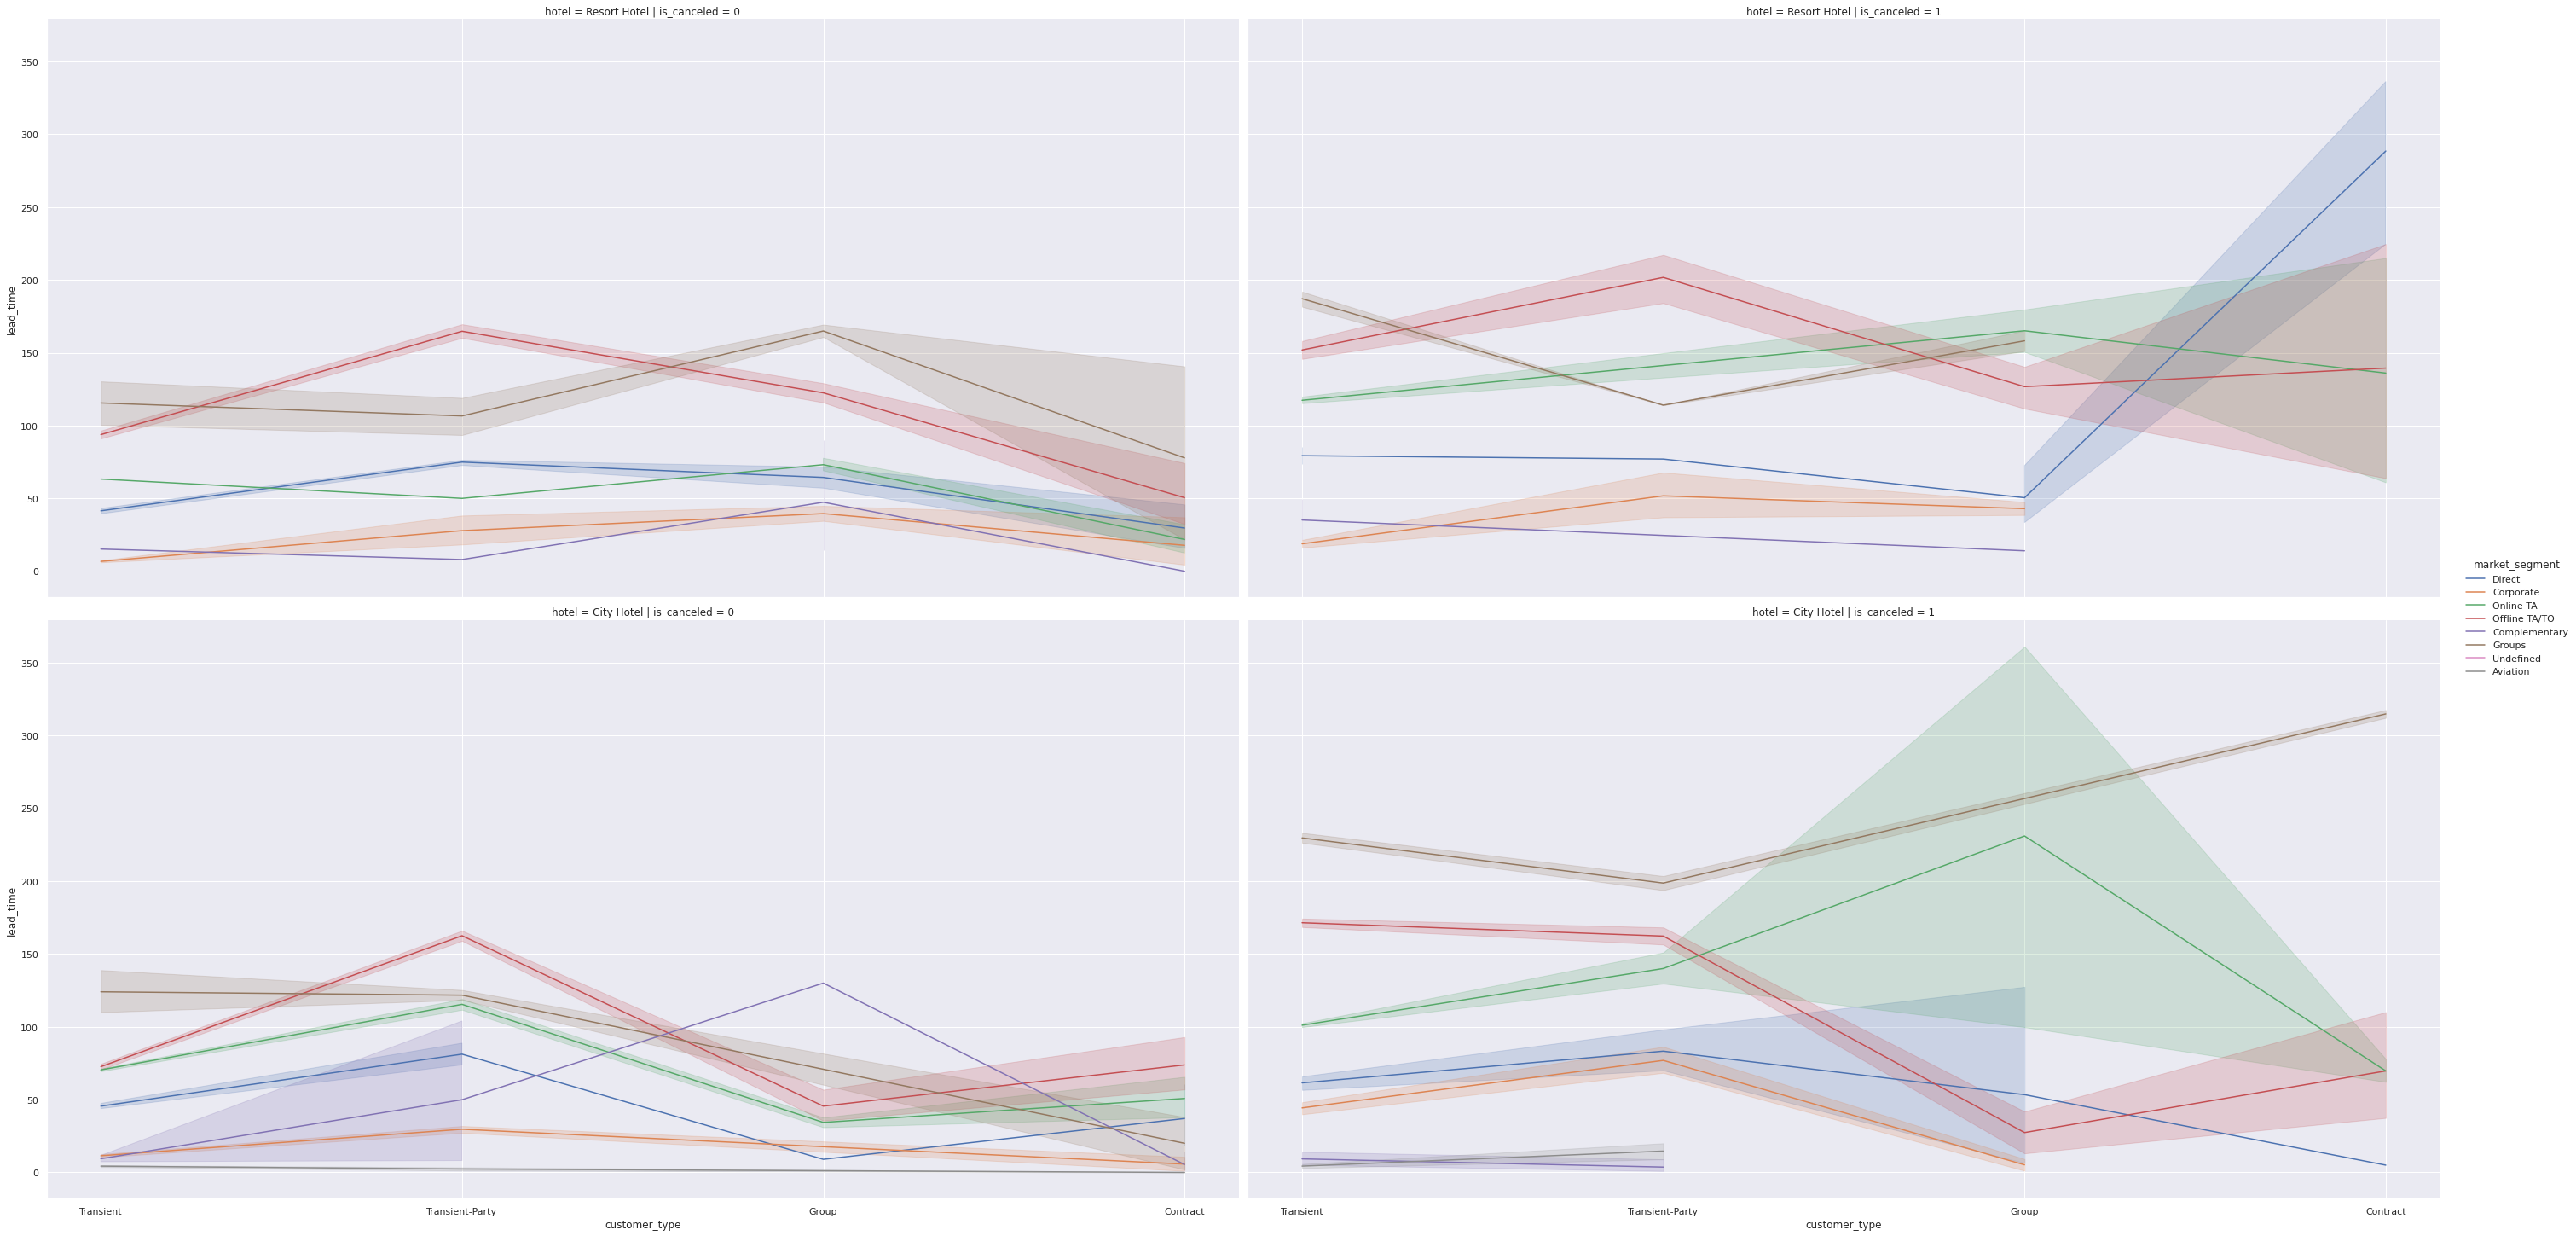

In [649]:
sns.relplot(
    data=df, kind="line",
    x='customer_type', y='lead_time',height=10,aspect=2,col="is_canceled",row='hotel',hue="market_segment",ax=ax)